Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


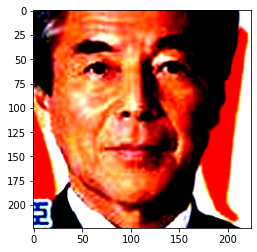

tensor(582)
Size of image: torch.Size([16, 3, 224, 224])
Type of image: torch.float32
Size of label: torch.Size([16])
Type of label: torch.int64
1131


In [39]:
import torchvision.transforms as trns
from PIL import Image
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import json
import os

use_folder = 'C'
class APDDataset(Dataset):
    def __init__(self, root, transform):
        
        self.transform = transform

        # Load image path and annotations
        with open(os.path.join(root, 'annotation_' + use_folder + '.json')) as jsonfile:
            self.data = {int(k):v for k,v in json.load(jsonfile).items()}

    def __getitem__(self, index):

        img_path = self.data[index]['file_path']
        img = Image.open(img_path).convert('RGB')
        lbl = int(self.data[index]['label'])
        if self.transform is not None:
            img = self.transform(img)
        return img, lbl

    def __len__(self):

        return len(self.data)


    
if __name__ == '__main__':
    
    train_transform = trns.Compose([
        trns.Resize((256, 256)),
        trns.RandomCrop((224, 224)),
        #trns.RandomHorizontalFlip(),
        trns.ToTensor(),
        trns.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    valid_transform = trns.Compose([
        trns.Resize((224, 224)),
        trns.ToTensor(),
        trns.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


    train_set = APDDataset(root='./data/train',transform=train_transform)

    train_loader = DataLoader(
        dataset=train_set, batch_size=16, shuffle=True, num_workers=1)

    import matplotlib.pyplot as plt
    import numpy as np
    
    for imgs, lbls in train_loader:

        np_imgs = imgs.detach().cpu().numpy()
        np_imgs = np.transpose(np_imgs,(0,2,3,1))
        img = np_imgs[1]
        plt.figure()
        plt.imshow(img) 
        plt.show()
        print(lbls[1])
        print('Size of image:', imgs.size())  # batch_size * 3 * 224 * 224
        print('Type of image:', imgs.dtype)   # float32
        print('Size of label:', lbls.size())  # batch_size
        print('Type of label:', lbls.dtype)   # int64(long)
        break
    print(len(train_loader))